In [1]:
import assnake
import pandas as pd
import numpy as np
import seaborn as sns

from assnake_core_taxonomy.metaphlan2.loaders import filter_metaphlan2

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

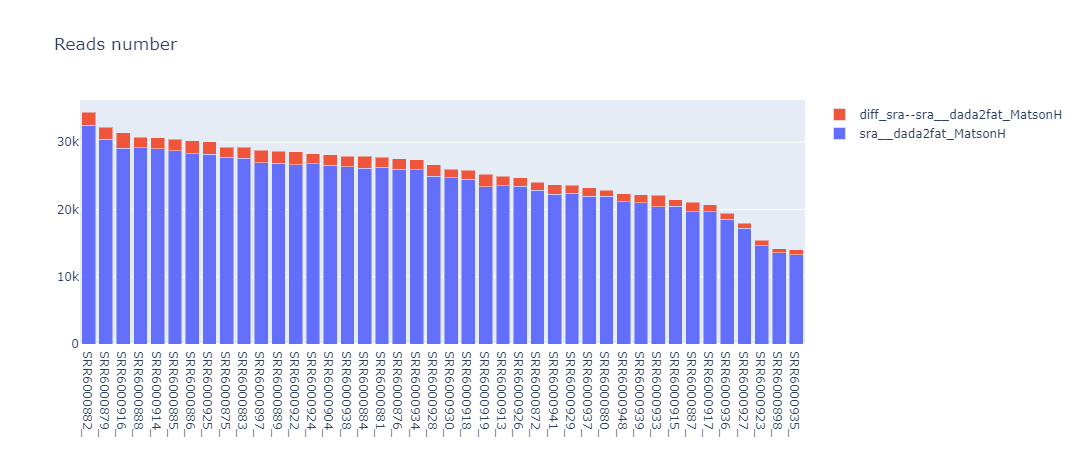

42


,preproc,df,fs_prefix,df_sample,reads
0,sra,Matson_Human_16s,/data11/bio/mg_data/CANCER_EXTERNAL,SRR6000939,22171
1,sra,Matson_Human_16s,/data11/bio/mg_data/CANCER_EXTERNAL,SRR6000938,27916
2,sra,Matson_Human_16s,/data11/bio/mg_data/CANCER_EXTERNAL,SRR6000919,25260


In [4]:
matson = assnake.Dataset('Matson_Human_16s')
matson.plot_reads_loss(sort='sra')
df_samples = matson.sample_sets['sra']
print(len(df_samples))
df_samples.head(3)

In [7]:
sra_run = pd.read_csv('../METADATA/SraRunTable.txt')
sra_run = sra_run[['Run', 'Assay Type', 'Host', 'LibrarySelection', 'Sample Name', 'subject_id']]
sra_run.head(3)
# sra_run.loc[(sra_run['Assay Type'] == 'WGS') & (sra_run['Host'] == 'Homo sapiens')]

_meta = df_samples.merge(sra_run, left_on = 'df_sample', right_on = 'Run')
print(len(_meta))
_meta.sort_values('subject_id').head(3)

meta = pd.read_csv('../METADATA/human_16S.sampleinfo.csv')
print(len(meta))
meta.head(3)

meta = meta.merge(_meta, left_on = 'Sample', right_on = 'subject_id')
meta = meta.drop(['df', 'fs_prefix', 'Run'], axis = 1)
meta = meta.set_index('df_sample')
meta.to_csv('../METADATA/meta_human_16s.tsv', sep = '\t')


42
42


In [6]:
meta

,Sample,Response,BORR,RECIST%,preproc,reads,Assay Type,Host,LibrarySelection,Sample Name,subject_id
df_sample,,,,,,,,,,,
SRR6000938,P01,NonResponder,Stable Disease,-11,sra,27916,AMPLICON,Homo sapiens,PCR,SAM_01,P01
SRR6000937,P02,Responder,Partial Response,-65,sra,23268,AMPLICON,Homo sapiens,PCR,SAM_02,P02
SRR6000948,P03,NonResponder,Progressive Disease,38,sra,22348,AMPLICON,Homo sapiens,PCR,SAM_03,P03
SRR6000941,P04,NonResponder,Stable Disease,-7,sra,23703,AMPLICON,Homo sapiens,PCR,SAM_04,P04
SRR6000935,P05,NonResponder,Progressive Disease,58,sra,14020,AMPLICON,Homo sapiens,PCR,SAM_05,P05
SRR6000934,P06,NonResponder,Stable Disease,27,sra,27398,AMPLICON,Homo sapiens,PCR,SAM_06,P06
SRR6000936,P07,Responder,Partial Response,-60,sra,19451,AMPLICON,Homo sapiens,PCR,SAM_07,P07
SRR6000939,P08,NonResponder,Progressive Disease,65,sra,22171,AMPLICON,Homo sapiens,PCR,SAM_08,P08
SRR6000933,P09,Responder,Partial Response,-51,sra,22084,AMPLICON,Homo sapiens,PCR,SAM_09,P09
